In [1]:
# boilerplate
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# libraries
from datetime import date, timedelta

# utils
from api.visualize import plot_audiogram_template_style
from api.derive import derive_gain_profile_from_row

### Synthetic Data
Comment this out later when we have real data

In [ ]:
np.random.seed(7)

schema_cols = [
    "participant_name",
    "participant_id",
    "date_tested",
    "age",
    "ear",
    "threshold_250",
    "threshold_500",
    "threshold_1000",
    "threshold_2000",
    "threshold_4000",
    "threshold_8000",
    "notes",
]

participants = [
    ("Rahil", "P001", 19),
    ("Raida", "P002", 27),
    ("Mom", "P003", 34),
    ("Dad", "P004", 52),
    ("Rehan", "P005", 63),
]

ears = ["L", "R"]
base_date = date(2025, 12, 10)

rows = []
for name, pid, age in participants:
    # pick one test date per participant so L/R align
    date_tested = base_date + timedelta(days=int(np.random.randint(0, 10)))

    for ear in ears:
        if pid in ["P001", "P002"]:
            # near-normal to mild
            thr_250 = np.random.normal(10, 3)
            thr_500 = np.random.normal(10, 3)
            thr_1000 = np.random.normal(12, 4)
            thr_2000 = np.random.normal(14, 4)
            thr_4000 = np.random.normal(18, 5)
            thr_8000 = np.random.normal(20, 6)
        elif pid == "P003":
            # moderate, slightly sloping
            thr_250 = np.random.normal(20, 4)
            thr_500 = np.random.normal(22, 4)
            thr_1000 = np.random.normal(25, 4)
            thr_2000 = np.random.normal(30, 5)
            thr_4000 = np.random.normal(40, 6)
            thr_8000 = np.random.normal(45, 7)
        elif pid == "P004":
            # more high-frequency loss
            thr_250 = np.random.normal(18, 4)
            thr_500 = np.random.normal(20, 4)
            thr_1000 = np.random.normal(25, 5)
            thr_2000 = np.random.normal(35, 6)
            thr_4000 = np.random.normal(55, 7)
            thr_8000 = np.random.normal(60, 8)
        else:
            # older, more severe high-frequency loss
            thr_250 = np.random.normal(25, 5)
            thr_500 = np.random.normal(30, 5)
            thr_1000 = np.random.normal(40, 6)
            thr_2000 = np.random.normal(55, 7)
            thr_4000 = np.random.normal(70, 8)
            thr_8000 = np.random.normal(75, 9)

        # Add mild asymmetry to the right ear for some participants
        if ear == "R" and pid in ["P003", "P005"]:
            thr_2000 += 5
            thr_4000 += 7
            thr_8000 += 7

        # Clip to a reasonable range
        vals = [thr_250, thr_500, thr_1000, thr_2000, thr_4000, thr_8000]
        vals = [float(np.clip(v, 0, 95)) for v in vals]

        notes = "Quiet room; wired earbuds" if np.random.rand() < 0.7 else "Some background noise noted"

        rows.append(
            {
                "participant_name": name,
                "participant_id": pid,
                "date_tested": date_tested,   # ✅ same for L/R
                "age": age,
                "ear": ear,
                "threshold_250": round(vals[0], 1),
                "threshold_500": round(vals[1], 1),
                "threshold_1000": round(vals[2], 1),
                "threshold_2000": round(vals[3], 1),
                "threshold_4000": round(vals[4], 1),
                "threshold_8000": round(vals[5], 1),
                "notes": notes,
            }
        )

df = pd.DataFrame(rows, columns=schema_cols)


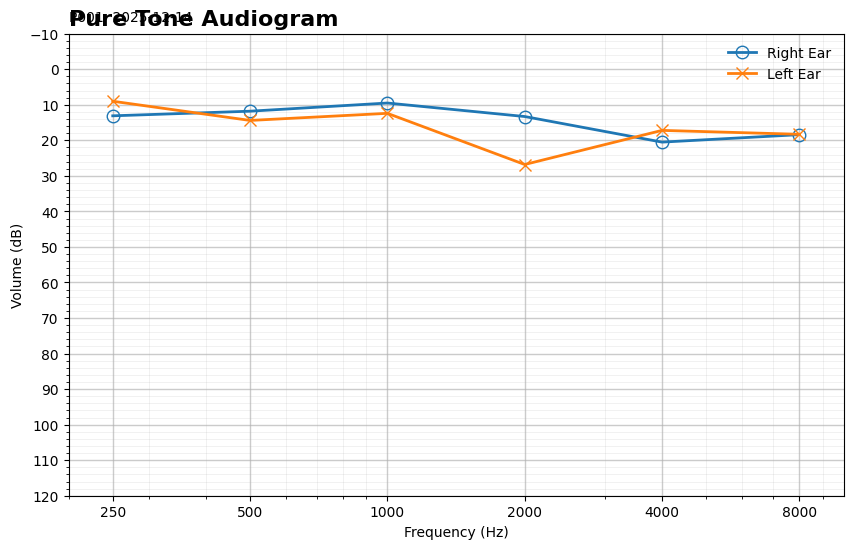

In [3]:
example_row = df.iloc[0]
pid = example_row["participant_id"]
dt = example_row["date_tested"]

# get matching left/right rows for that participant + date
row_L = df[(df["participant_id"] == pid) & (df["date_tested"] == dt) & (df["ear"] == "L")].iloc[0]
row_R = df[(df["participant_id"] == pid) & (df["date_tested"] == dt) & (df["ear"] == "R")].iloc[0]

# NEW: audiogram visualization (both ears on one plot)
fig_aud, ax_aud = plot_audiogram_template_style(row_left=row_L, row_right=row_R, title="Pure Tone Audiogram", y_label="Volume (dB)")

# Gain profile (pick one ear, or do both)
gain_L_df = derive_gain_profile_from_row(row_L, reference="pta4", compression_ratio=0.5, max_gain=25, smoothing="ma3")
gain_R_df = derive_gain_profile_from_row(row_R, reference="pta4", compression_ratio=0.5, max_gain=25, smoothing="ma3")

plt.show()